In [171]:
%display typeset

from scipy.optimize import minimize 
import numpy as np
import operator as op
import math
import random as rd

# Divisão do Tempo

In [172]:
data = np.genfromtxt('stringency_index.csv', delimiter=',')[1:]
serie = [(k) for k in data]

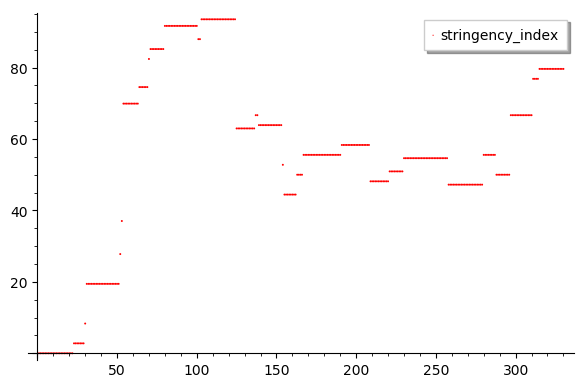

In [173]:
plot = list_plot(serie, color='red', pointsize=2, legend_label='stringency_index', alpha=1)
plot.legend()

show(plot)

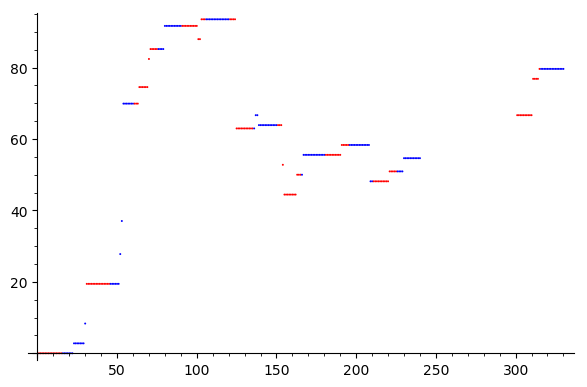

In [174]:
t0  = serie[0  :15 ]
t1  = serie[15 :30 ]
t2  = serie[30 :45 ]
t3  = serie[45 :60 ]
t4  = serie[60 :75 ]
t5  = serie[75 :90 ]
t6  = serie[90 :105]
t7  = serie[105:120]
t8  = serie[120:135]
t9  = serie[135:150]
t10 = serie[150:165]
t11 = serie[165:180]
t12 = serie[180:195]
t13 = serie[195:210]
t14 = serie[210:225]
t15 = serie[225:240]
t16 = serie[240:255]
t17 = serie[255:270]
t18 = serie[270:285]
t19 = serie[285:300]
t16 = serie[300:315]
t17 = serie[315:330]

plot_t0  = list_plot(t0 , color='red' , pointsize=2, alpha=1)
plot_t1  = list_plot(t1 , color='blue', pointsize=2, alpha=1)
plot_t2  = list_plot(t2 , color='red' , pointsize=2, alpha=1)
plot_t3  = list_plot(t3 , color='blue', pointsize=2, alpha=1)
plot_t4  = list_plot(t4 , color='red' , pointsize=2, alpha=1)
plot_t5  = list_plot(t5 , color='blue', pointsize=2, alpha=1)
plot_t6  = list_plot(t6 , color='red' , pointsize=2, alpha=1)
plot_t7  = list_plot(t7 , color='blue', pointsize=2, alpha=1)
plot_t8  = list_plot(t8 , color='red' , pointsize=2, alpha=1)
plot_t9  = list_plot(t9 , color='blue', pointsize=2, alpha=1)
plot_t10 = list_plot(t10, color='red' , pointsize=2, alpha=1)
plot_t11 = list_plot(t11, color='blue', pointsize=2, alpha=1)
plot_t12 = list_plot(t12, color='red' , pointsize=2, alpha=1)
plot_t13 = list_plot(t13, color='blue', pointsize=2, alpha=1)
plot_t14 = list_plot(t14, color='red' , pointsize=2, alpha=1)
plot_t15 = list_plot(t15, color='blue', pointsize=2, alpha=1)
plot_t16 = list_plot(t16, color='red' , pointsize=2, alpha=1)
plot_t17 = list_plot(t17, color='blue', pointsize=2, alpha=1)

show(plot_t0 + plot_t1  + plot_t2  + plot_t3  + plot_t4  + plot_t5  + plot_t6  + plot_t7  + plot_t8 + 
     plot_t9 + plot_t10 + plot_t11 + plot_t12 + plot_t13 + plot_t14 + plot_t15 + plot_t16 + plot_t17)

# Fit

In [175]:
def model(t, comp, params):
    # alpha e f fixos aqui
    S = comp[0]
    E = comp[1]
    I = comp[2]
    R = comp[3]
    D = comp[4]
    A = comp[5]
    
#     S, E, I, R, D, A = comp
#     B0, Ti, t0, alpha, rho, f = params
    B0 = params[0]
    Ti = params[1]
    t0 = params[2]
    alpha = params[3]
    rho = params[4]
    f = params[5]
    
    '''
        S, E, I, R e D são os compartimentos usuais.
        B0 é o valor inicial de beta
        Ti é a taxa de mortalidade
        tempos é a partição do tempo que estamos fazendo (dia inicial de cada período, sem considerar o dia 0)
        alpha é constantes
        rho é o vetor dos rho_k para cada intervalo de tempo (usados na função de beta)
        f é constante também
    '''
    N = S + E + I + R + D
    beta = B0 * (1 - rho * (t - t0) / t)
        
    dS = -beta / N * S * I
    dE = beta / N * S * I - alpha * E
    dI = alpha * E - I / Ti
    dR = (1 - f) / Ti * I
    dD = f / Ti * I
    dA = alpha * E
    
    return [
        dS,
        dE,
        dI,
        dR,
        dD,
        dA
    ]

In [176]:
tempos = [15*k for k in range(23)]
tempos.append(340)
inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]

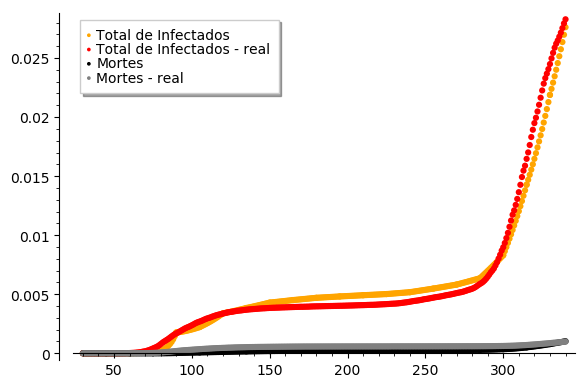

In [183]:
sol = []
inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]

for i in range(len(opt[0])):
    tspan = [tempos[i + 2], tempos[i + 3]]
    T = ode_solver()
    T.function = model
    if i == len(opt[0]) - 1:
        T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0],
                    params = [opt[0][i], opt[1][i], opt[2][i], opt[3][i], opt[4][i], opt[5][i]])
    else:
        T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0],
                    params = [opt[0][i], opt[1][i], opt[2][i], opt[3][i], opt[4][i], opt[5][i]])
    inits = T.solution[-1][1]
    for item in T.solution:
        sol.append(item)
        
model_out_0 = [(k[0], k[1][0]) for k in sol]
model_out_1 = [(k[0], k[1][1]) for k in sol]
model_out_2 = [(k[0], k[1][2]) for k in sol]
model_out_3 = [(k[0], k[1][3]) for k in sol]
model_out_4 = [(k[0], k[1][4]) for k in sol]
model_out_5 = [(k[0], k[1][5]) for k in sol]

plot0 = list_plot(model_out_0, color = 'green', pointsize = 20, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2, color = 'red', pointsize = 20, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3, color = 'blue', pointsize = 20, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4, color = 'black', pointsize = 20, alpha = 1, legend_label = 'Mortes')
plot5 = list_plot(model_out_5, color = 'orange', pointsize = 20, alpha = 1, legend_label = 'Total de Infectados')

real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data = []
for k in real_data:
    if tempos[2] <= k[0] <= tempos[-1]:
        data.append((k[0], k[1]/pop, k[3]/pop))

data1 = [(item[0], item[1]) for item in data]
data2 = [(item[0], item[2]) for item in data]

plot6 = list_plot(data1, color = 'red', pointsize = 20, alpha = 1, legend_label = 'Total de Infectados - real')
plot7 = list_plot(data2, color = 'gray', pointsize = 20, alpha = 1, legend_label = 'Mortes - real')

plot5.legend()
# plot6.legend()
plot4.legend()
# plot7.legend()
plot1.legend()
plot0.legend()
plot2.legend()
plot3.legend()

show(plot5 + plot6 + plot4 + plot7)

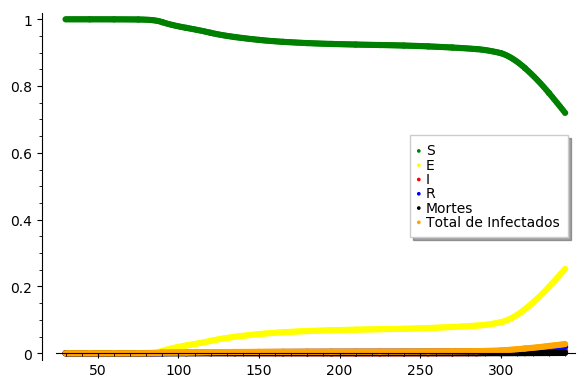

In [187]:
show(plot0 + plot1 + plot2 + plot3 + plot4 + plot5)

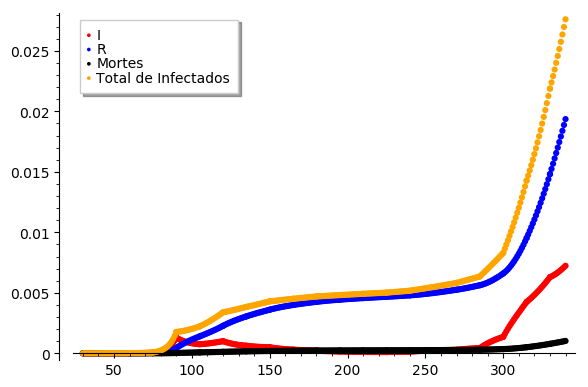

In [189]:
show(plot2 + plot3 + plot4 + plot5)

# $R_0$ no começo do processo

In [190]:
B0 = opt[0][0]
Ti = opt[1][0]

beta = B0

R0 = beta * Ti
R0

27.642653851743297

# $R_0$ agora

In [191]:
B0 = opt[0][-1]
Ti = opt[1][-1]
rho = opt[4][-1]

beta = B0 * (1 - rho * (tempos[-1] - tempos[-2]) / tempos[-1])

R0 = beta * Ti
R0

16.5316620305635

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:64: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


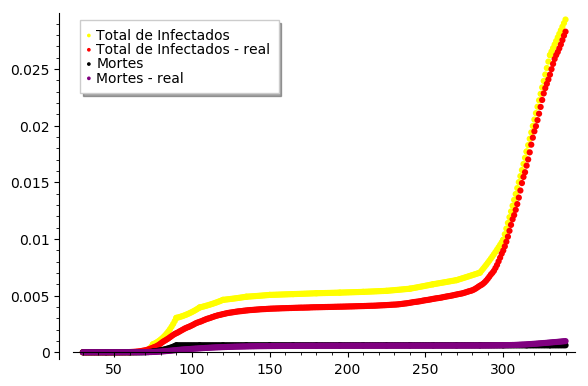

In [192]:
pop = 60461828
sol = []
opt = [[], [], [], [], [], []]

for i in range(2, 23):
    tspan = [tempos[i], tempos[i + 1]]
    real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
    data = []
    if i == 2:
        inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]
        x0 = [2, 14, 23, 0.2, 0.2, 0.05]
    else:
        inits = T.solution[-1][1]
        x0 = params

    for k in real_data:
        if tspan[0] <= k[0] <= tspan[1]:
            data.append((k[0], k[1]/pop, k[3]/pop))

    def residual(params, data):
        B0 = params[0]
        Ti = params[1]
        t0 = params[2]
        alpha = params[3]
        rho = params[4]
        f = params[5]

        T = ode_solver()
        T.function = model
        T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], params = [B0, Ti, t0, alpha, rho, f])

        model_out_0 = [(k[0], k[1][0]) for k in T.solution]
        model_out_1 = [(k[0], k[1][1]) for k in T.solution]
        model_out_2 = [(k[0], k[1][2]) for k in T.solution]
        model_out_3 = [(k[0], k[1][3]) for k in T.solution]
        model_out_4 = [(k[0], k[1][4]) for k in T.solution]
        model_out_5 = [(k[0], k[1][5]) for k in T.solution]

        erro_I = 0
        erro_D = 0
        for i in range(tspan[1] - tspan[0]):
            erro_I += (model_out_2[i][1] - data[i][1])**2
            erro_D += (model_out_5[i][1] - data[i][2])**2

        return 100*erro_I + erro_D

    cons = ({'type': 'ineq', 'fun': lambda x0: x0[0]},
            {'type': 'ineq', 'fun': lambda x0: x0[1]},
            {'type': 'ineq', 'fun': lambda x0: x0[2] - 1},
            {'type': 'ineq', 'fun': lambda x0: - x0[2] + 30},
            {'type': 'ineq', 'fun': lambda x0: x0[3]},
            {'type': 'ineq', 'fun': lambda x0: x0[4]},
            {'type': 'ineq', 'fun': lambda x0: x0[5]},
            {'type': 'ineq', 'fun': lambda x0: 1 - x0[3]},
            {'type': 'ineq', 'fun': lambda x0: 1 - x0[4]},
            {'type': 'ineq', 'fun': lambda x0: 1 - x0[5]}
            )

    res = minimize(residual, x0, method = 'SLSQP', args = data, tol = 1e-10, constraints = cons)
    params = res.x

    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], params = res.x)
    
    opt[0].append(res.x[0])
    opt[1].append(res.x[1])
    opt[2].append(res.x[2])
    opt[3].append(res.x[3])
    opt[4].append(res.x[4])
    opt[5].append(res.x[5])
    
    for item in T.solution:
        sol.append(item)

for i in range(len(opt[-1])):
    opt[-1][i] *= 10

#########################################################################################################################

sol = []
inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]

for i in range(len(opt[0])):
    tspan = [tempos[i + 2], tempos[i + 3]]
    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0],
                params = [opt[0][i], opt[1][i], opt[2][i], opt[3][i], opt[4][i], opt[5][i]])
    inits = T.solution[-1][1]
    for item in T.solution:
        sol.append(item)
        
model_out_0 = [(k[0], k[1][0]) for k in sol]
model_out_1 = [(k[0], k[1][1]) for k in sol]
model_out_2 = [(k[0], k[1][2]) for k in sol]
model_out_3 = [(k[0], k[1][3]) for k in sol]
model_out_4 = [(k[0], k[1][4]) for k in sol]
model_out_5 = [(k[0], k[1][5]) for k in sol]

plot0 = list_plot(model_out_0, color = 'red', pointsize = 20, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1, color = 'green', pointsize = 20, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2, color = 'pink', pointsize = 20, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3, color = 'blue', pointsize = 20, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4, color = 'black', pointsize = 20, alpha = 1, legend_label = 'Mortes')
plot5 = list_plot(model_out_5, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'Total de Infectados')

real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data = []
for k in real_data:
    if tempos[2] <= k[0] <= tempos[-1]:
        data.append((k[0], k[1]/pop, k[3]/pop))

data1 = [(item[0], item[1]) for item in data]
data2 = [(item[0], item[2]) for item in data]

plot6 = list_plot(data1, color = 'red', pointsize = 20, alpha = 1, legend_label = 'Total de Infectados - real')
plot7 = list_plot(data2, color = 'purple', pointsize = 20, alpha = 1, legend_label = 'Mortes - real')

plot5.legend()
# plot6.legend()
plot4.legend()
# plot7.legend()
plot1.legend()
plot0.legend()
plot2.legend()
plot3.legend()

show(plot5 + plot6 + plot4 + plot7)
# show(plot0 + plot1 + plot2 + plot3 + plot4 + plot5)

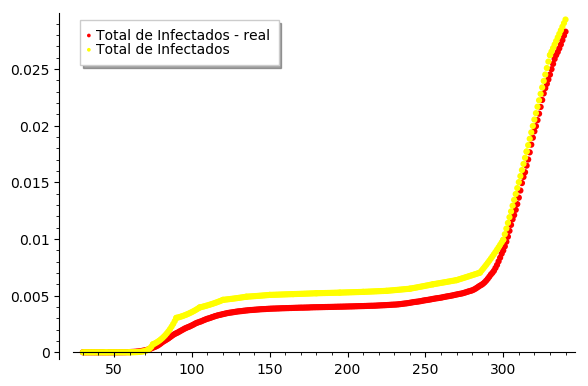

In [193]:
show(plot6 + plot5)

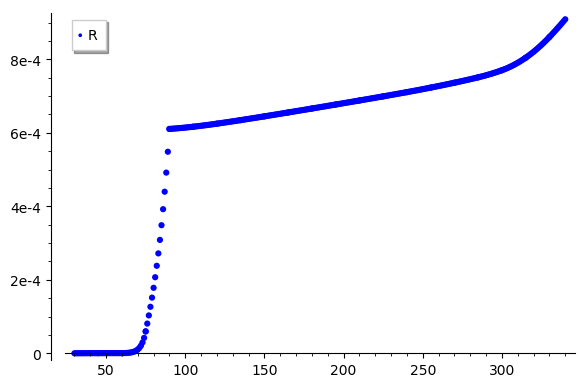

In [194]:
show(plot3)

# $R_0$ no começo do processo

In [195]:
B0 = opt[0][0]
Ti = opt[1][0]

beta = B0

R0 = beta * Ti
R0

27.625733806874862

# $R_0$ agora

In [196]:
B0 = opt[0][-1]
Ti = opt[1][-1]
rho = opt[4][-1]

beta = B0 * (1 - rho * (tempos[-1] - tempos[-2]) / tempos[-1])

R0 = beta * Ti
R0

4988.82158461473

In [197]:
rho

0.9999917645542068

In [198]:
B0

0.9640660849700573

In [199]:
Ti

5331.581303056742

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:64: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


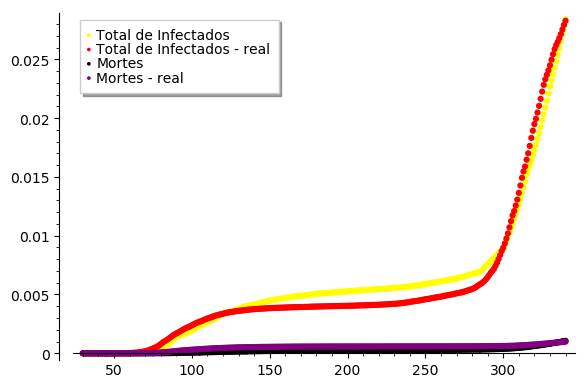

In [200]:
pop = 60461828
sol = []
opt = [[], [], [], [], [], []]

for i in range(2, 23):
    tspan = [tempos[i], tempos[i + 1]]
    real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
    data = []
    if i == 2:
        inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]
        x0 = [2, 14, 23, 0.2, 0.2, 0.05]
    else:
        inits = T.solution[-1][1]
        x0 = params

    for k in real_data:
        if tspan[0] <= k[0] <= tspan[1]:
            data.append((k[0], k[1]/pop, k[3]/pop))

    def residual(params, data):
        B0 = params[0]
        t0 = params[1]
        Ti = params[2]
        alpha = params[3]
        rho = params[4]
        f = params[5]

        T = ode_solver()
        T.function = model
        T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], params = [B0, Ti, t0, alpha, rho, f])

        model_out_0 = [(k[0], k[1][0]) for k in T.solution]
        model_out_1 = [(k[0], k[1][1]) for k in T.solution]
        model_out_2 = [(k[0], k[1][2]) for k in T.solution]
        model_out_3 = [(k[0], k[1][3]) for k in T.solution]
        model_out_4 = [(k[0], k[1][4]) for k in T.solution]
        model_out_5 = [(k[0], k[1][5]) for k in T.solution]

        erro_I = 0
        erro_D = 0
        for i in range(tspan[1] - tspan[0]):
            erro_I += (model_out_2[i][1] - data[i][1])**2
            erro_D += (model_out_5[i][1] - data[i][2])**2

        return 1.5*erro_I + erro_D

    cons = ({'type': 'ineq', 'fun': lambda x0: x0[0]},
            {'type': 'ineq', 'fun': lambda x0: x0[1]},
            {'type': 'ineq', 'fun': lambda x0: x0[2] - 1},
            {'type': 'ineq', 'fun': lambda x0: - x0[2] + 30},
            {'type': 'ineq', 'fun': lambda x0: x0[3]},
            {'type': 'ineq', 'fun': lambda x0: x0[4]},
            {'type': 'ineq', 'fun': lambda x0: x0[5]},
            {'type': 'ineq', 'fun': lambda x0: 1 - x0[3]},
            {'type': 'ineq', 'fun': lambda x0: 1 - x0[4]},
            {'type': 'ineq', 'fun': lambda x0: 1 - x0[5]}
            )

    res = minimize(residual, x0, method = 'SLSQP', args = data, tol = 1e-10, constraints = cons)
    params = res.x

    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], params = res.x)
    
    opt[0].append(res.x[0])
    opt[1].append(res.x[1])
    opt[2].append(res.x[2])
    opt[3].append(res.x[3])
    opt[4].append(res.x[4])
    opt[5].append(res.x[5])
    
    for item in T.solution:
        sol.append(item)

# for i in range(len(opt[-1])):
#     opt[-1][i] *= 10

#########################################################################################################################

sol = []
inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]

for i in range(len(opt[0])):
    tspan = [tempos[i + 2], tempos[i + 3]]
    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0],
                params = [opt[0][i], opt[1][i], opt[2][i], opt[3][i], opt[4][i], opt[5][i]])
    inits = T.solution[-1][1]
    for item in T.solution:
        sol.append(item)
        
model_out_0 = [(k[0], k[1][0]) for k in sol]
model_out_1 = [(k[0], k[1][1]) for k in sol]
model_out_2 = [(k[0], k[1][2]) for k in sol]
model_out_3 = [(k[0], k[1][3]) for k in sol]
model_out_4 = [(k[0], k[1][4]) for k in sol]
model_out_5 = [(k[0], k[1][5]) for k in sol]

plot0 = list_plot(model_out_0, color = 'red', pointsize = 20, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1, color = 'green', pointsize = 20, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2, color = 'pink', pointsize = 20, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3, color = 'blue', pointsize = 20, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4, color = 'black', pointsize = 20, alpha = 1, legend_label = 'Mortes')
plot5 = list_plot(model_out_5, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'Total de Infectados')

real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data = []
for k in real_data:
    if tempos[2] <= k[0] <= tempos[-1]:
        data.append((k[0], k[1]/pop, k[3]/pop))

data1 = [(item[0], item[1]) for item in data]
data2 = [(item[0], item[2]) for item in data]

plot6 = list_plot(data1, color = 'red', pointsize = 20, alpha = 1, legend_label = 'Total de Infectados - real')
plot7 = list_plot(data2, color = 'purple', pointsize = 20, alpha = 1, legend_label = 'Mortes - real')

plot5.legend()
# plot6.legend()
plot4.legend()
# plot7.legend()
plot1.legend()
plot0.legend()
plot2.legend()
plot3.legend()

show(plot5 + plot6 + plot4 + plot7)
# show(plot0 + plot1 + plot2 + plot3 + plot4 + plot5)

In [201]:
B0 = opt[0][0]
Ti = opt[2][0]

beta = B0

R0 = beta * Ti
R0

45.41362175254253

In [202]:
B0 = opt[0][-1]
Ti = opt[2][-1]
rho = opt[-1][-1]

beta = B0 * (1 - rho * (tempos[-1] - tempos[-2]) / tempos[-1])

R0 = beta * Ti
R0

97.93446721849655

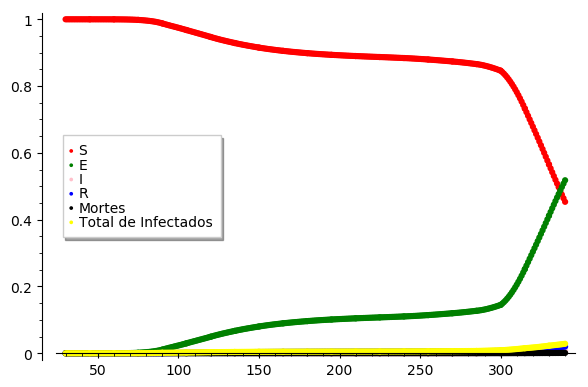

In [203]:
show(plot0 + plot1 + plot2 + plot3 + plot4 + plot5)

fim


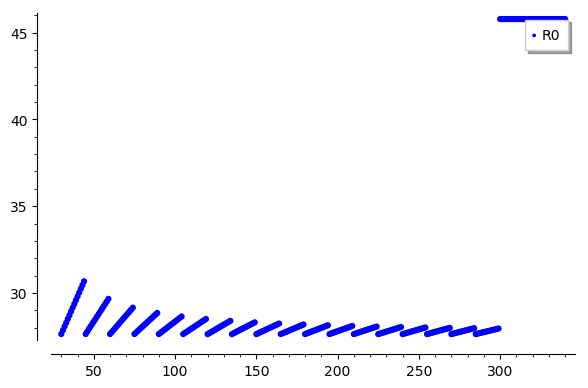

In [204]:
R0 = []
for i in range(30, 341):
    ind = (i // 15) - 2
    if i % 15 == 0:
        B0 = opt[0][ind]
        Ti = opt[1][ind]
        beta = B0
        
        R0.append((i, beta * Ti))
    else:
        B0 = opt[0][ind]
        Ti = opt[1][ind]
        rho = opt[4][ind]

        beta = B0 * (1 - rho * (tempos[ind + 2] - i) / tempos[ind + 2])
        
        R0.append((i, beta * Ti))

print("fim")

plot = list_plot(R0, color = 'blue', pointsize = 20, alpha = 1, legend_label = 'R0')
plot.legend()
show(plot)

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:81: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


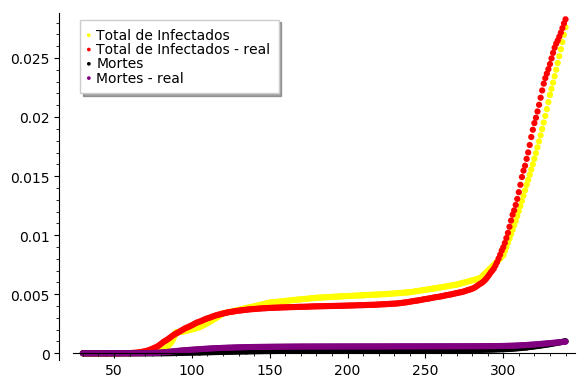

In [205]:
pop = 60461828
sol = []
opt = [[], [], [], [], [], []]

for i in range(2, 23):
    tspan = [tempos[i], tempos[i + 1]]
    real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
    data = []
    if i == 2:
        inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]
        x0 = [2, 14, 23, 0.2, 0.2, 0.05]
    else:
        inits = T.solution[-1][1]
        x0 = params

    for k in real_data:
        if tspan[0] <= k[0] <= tspan[1]:
            data.append((k[0], k[1]/pop, k[3]/pop))

    def residual(params, data):
        B0 = params[0]
        t0 = params[1]
        Ti = params[2]
        alpha = params[3]
        rho = params[4]
        f = params[5]

        T = ode_solver()
        T.function = model
        T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], params = [B0, Ti, t0, alpha, rho, f])

        model_out_0 = [(k[0], k[1][0]) for k in T.solution]
        model_out_1 = [(k[0], k[1][1]) for k in T.solution]
        model_out_2 = [(k[0], k[1][2]) for k in T.solution]
        model_out_3 = [(k[0], k[1][3]) for k in T.solution]
        model_out_4 = [(k[0], k[1][4]) for k in T.solution]
        model_out_5 = [(k[0], k[1][5]) for k in T.solution]

        erro_I = 0
        erro_D = 0
        for i in range(tspan[1] - tspan[0]):
            erro_I += (model_out_2[i][1] - data[i][1])**2
            erro_D += (model_out_5[i][1] - data[i][2])**2

        return 1.5*erro_I + erro_D
    
    if i == 2:
        cons = ({'type': 'ineq', 'fun': lambda x0: x0[0]},
                {'type': 'ineq', 'fun': lambda x0: x0[1]},
                {'type': 'ineq', 'fun': lambda x0: x0[2] - 1},
                {'type': 'ineq', 'fun': lambda x0: - x0[2] + 30},
                {'type': 'ineq', 'fun': lambda x0: x0[3]},
                {'type': 'ineq', 'fun': lambda x0: x0[4]},
                {'type': 'ineq', 'fun': lambda x0: x0[5]},
                {'type': 'ineq', 'fun': lambda x0: 1 - x0[3]},
                {'type': 'ineq', 'fun': lambda x0: 1 - x0[4]},
                {'type': 'ineq', 'fun': lambda x0: 1 - x0[5]}
                )
    else:
        beta = x0[0] * (1 - x0[4] * (tempos[i] - tempos[i - 1]) / tempos[i])
        
        cons = ({'type': 'ineq', 'fun': lambda x0: x0[0] - beta},
                {'type': 'ineq', 'fun': lambda x0: beta - x0[0]},
                {'type': 'ineq', 'fun': lambda x0: x0[1]},
                {'type': 'ineq', 'fun': lambda x0: x0[2] - 14},
                {'type': 'ineq', 'fun': lambda x0: 14 - x0[2]},
                {'type': 'ineq', 'fun': lambda x0: x0[3]},
                {'type': 'ineq', 'fun': lambda x0: x0[4]},
                {'type': 'ineq', 'fun': lambda x0: x0[5]},
                {'type': 'ineq', 'fun': lambda x0: 1 - x0[3]},
                {'type': 'ineq', 'fun': lambda x0: 1 - x0[4]},
                {'type': 'ineq', 'fun': lambda x0: 1 - x0[5]}
                )
        
        
    res = minimize(residual, x0, method = 'SLSQP', args = data, tol = 1e-10, constraints = cons)
    params = res.x

    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], params = res.x)
    
    opt[0].append(res.x[0])
    opt[1].append(res.x[1])
    opt[2].append(res.x[2])
    opt[3].append(res.x[3])
    opt[4].append(res.x[4])
    opt[5].append(res.x[5])
    
    for item in T.solution:
        sol.append(item)

# for i in range(len(opt[-1])):
#     opt[-1][i] *= 10

#########################################################################################################################

sol = []
inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]

for i in range(len(opt[0])):
    tspan = [tempos[i + 2], tempos[i + 3]]
    T = ode_solver()
    T.function = model
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0],
                params = [opt[0][i], opt[1][i], opt[2][i], opt[3][i], opt[4][i], opt[5][i]])
    inits = T.solution[-1][1]
    for item in T.solution:
        sol.append(item)
        
model_out_0 = [(k[0], k[1][0]) for k in sol]
model_out_1 = [(k[0], k[1][1]) for k in sol]
model_out_2 = [(k[0], k[1][2]) for k in sol]
model_out_3 = [(k[0], k[1][3]) for k in sol]
model_out_4 = [(k[0], k[1][4]) for k in sol]
model_out_5 = [(k[0], k[1][5]) for k in sol]

plot0 = list_plot(model_out_0, color = 'red', pointsize = 20, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1, color = 'green', pointsize = 20, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2, color = 'pink', pointsize = 20, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3, color = 'blue', pointsize = 20, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4, color = 'black', pointsize = 20, alpha = 1, legend_label = 'Mortes')
plot5 = list_plot(model_out_5, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'Total de Infectados')

real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data = []
for k in real_data:
    if tempos[2] <= k[0] <= tempos[-1]:
        data.append((k[0], k[1]/pop, k[3]/pop))

data1 = [(item[0], item[1]) for item in data]
data2 = [(item[0], item[2]) for item in data]

plot6 = list_plot(data1, color = 'red', pointsize = 20, alpha = 1, legend_label = 'Total de Infectados - real')
plot7 = list_plot(data2, color = 'purple', pointsize = 20, alpha = 1, legend_label = 'Mortes - real')

plot5.legend()
# plot6.legend()
plot4.legend()
# plot7.legend()
plot1.legend()
plot0.legend()
plot2.legend()
plot3.legend()

show(plot5 + plot6 + plot4 + plot7)
# show(plot0 + plot1 + plot2 + plot3 + plot4 + plot5)

fim


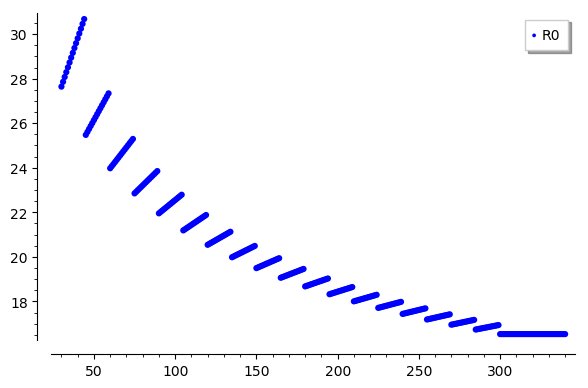

In [206]:
R0 = []
for i in range(30, 341):
    ind = (i // 15) - 2
    if i % 15 == 0:
        B0 = opt[0][ind]
        Ti = opt[1][ind]
        beta = B0
        
        R0.append((i, beta * Ti))
    else:
        B0 = opt[0][ind]
        Ti = opt[1][ind]
        rho = opt[4][ind]

        beta = B0 * (1 - rho * (tempos[ind + 2] - i) / tempos[ind + 2])
        
        R0.append((i, beta * Ti))

print("fim")

plot = list_plot(R0, color = 'blue', pointsize = 20, alpha = 1, legend_label = 'R0')
plot.legend()
show(plot)

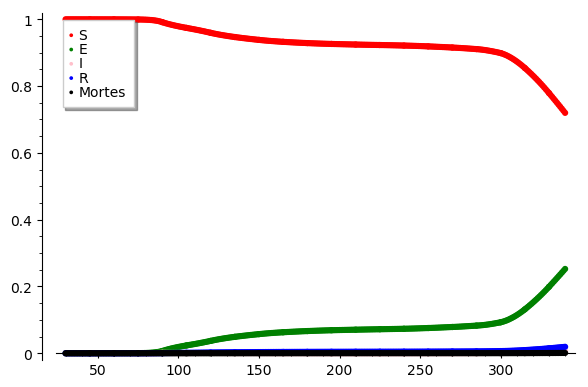

In [207]:
show(plot0 + plot1 + plot2 + plot3 + plot4)

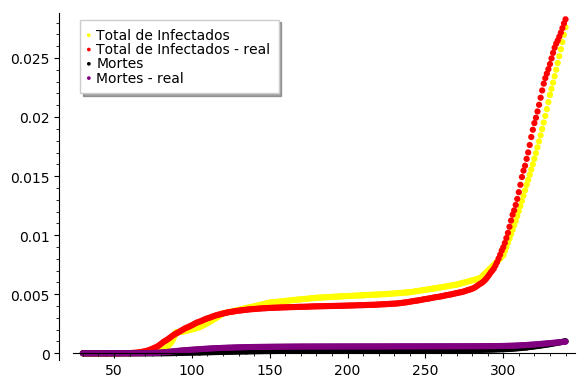

In [208]:
sol = []
inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]

for i in range(len(opt[0])):
    tspan = [tempos[i + 2], tempos[i + 3]]
    T = ode_solver()
    T.function = model
    if i == len(opt[0]) - 1:
        T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0],
                    params = [opt[0][i], opt[1][i], opt[2][i], opt[3][i], opt[4][i], opt[5][i]])
    else:
        T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0],
                    params = [opt[0][i], opt[1][i], opt[2][i], opt[3][i], opt[4][i], opt[5][i]])
    inits = T.solution[-1][1]
    for item in T.solution:
        sol.append(item)
        
model_out_0 = [(k[0], k[1][0]) for k in sol]
model_out_1 = [(k[0], k[1][1]) for k in sol]
model_out_2 = [(k[0], k[1][2]) for k in sol]
model_out_3 = [(k[0], k[1][3]) for k in sol]
model_out_4 = [(k[0], k[1][4]) for k in sol]
model_out_5 = [(k[0], k[1][5]) for k in sol]

plot0 = list_plot(model_out_0, color = 'red', pointsize = 20, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1, color = 'green', pointsize = 20, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2, color = 'pink', pointsize = 20, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3, color = 'blue', pointsize = 20, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4, color = 'black', pointsize = 20, alpha = 1, legend_label = 'Mortes')
plot5 = list_plot(model_out_5, color = 'yellow', pointsize = 20, alpha = 1, legend_label = 'Total de Infectados')

real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data = []
for k in real_data:
    if tempos[2] <= k[0] <= tempos[-1]:
        data.append((k[0], k[1]/pop, k[3]/pop))

data1 = [(item[0], item[1]) for item in data]
data2 = [(item[0], item[2]) for item in data]

plot6 = list_plot(data1, color = 'red', pointsize = 20, alpha = 1, legend_label = 'Total de Infectados - real')
plot7 = list_plot(data2, color = 'purple', pointsize = 20, alpha = 1, legend_label = 'Mortes - real')

plot5.legend()
# plot6.legend()
plot4.legend()
# plot7.legend()
plot1.legend()
plot0.legend()
plot2.legend()
plot3.legend()

show(plot5 + plot6 + plot4 + plot7)
# show(plot0 + plot1 + plot2 + plot3 + plot4 + plot5)

In [209]:
B0 = opt[0][0]
Ti = opt[2][0]

beta = B0

R0 = beta * Ti
R0

45.41362175254253

In [210]:
B0 = opt[0][-1]
Ti = opt[2][-1]
rho = opt[-1][-1]

beta = B0 * (1 - rho * (tempos[-1] - tempos[-2]) / tempos[-1])

R0 = beta * Ti
R0

16.507528022237594